# 데이터 이미지 파일 점검 및 변환

In [1]:
# 필요 라이브러리 import
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pathlib
from PIL import Image

In [16]:
# 데이터 경로 설정
train_data_path = os.path.join(os.getcwd(), 'data', 'origin_data', 'train')
test_data_path = os.path.join(os.getcwd(), 'data', 'origin_data', 'valid')

In [17]:
# 이미지 확장자 확인
def check_extension(data_path):
    ext_freq = {}

    for label in os.listdir(data_path):
        folder_path = os.path.join(data_path, label)

        for file_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file_name)
            extension = pathlib.Path(image_path).suffix     # 파일의 확장자 확인
            if extension not in ext_freq.keys():
                ext_freq[extension] = 1
            else:
                ext_freq[extension] += 1
    return ext_freq

train_ext_freq = check_extension(train_data_path)
test_ext_freq = check_extension(test_data_path)

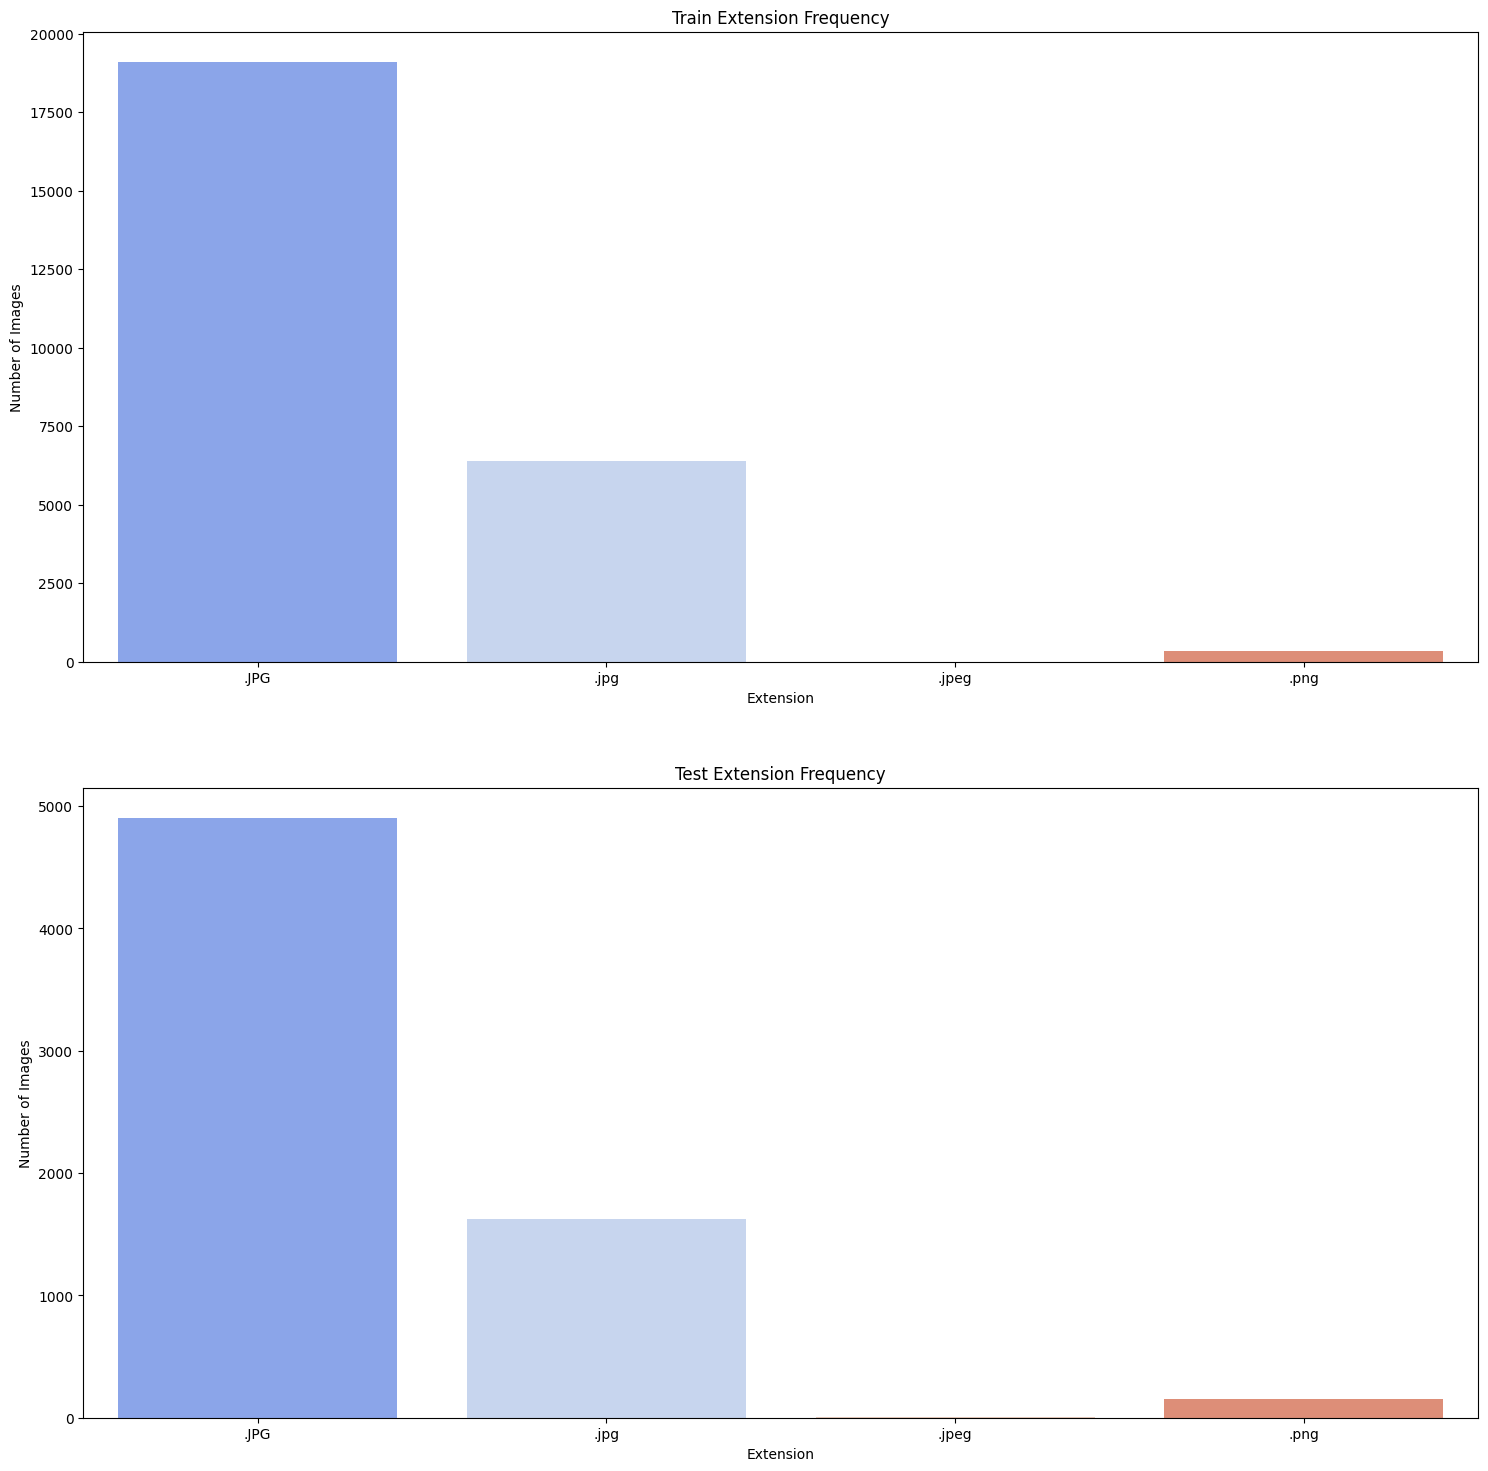

In [47]:
# 이미지 확장자별 빈도수 확인
plt.figure(figsize=(18, 18))
plt.subplot(2, 1, 1)
sns.barplot(x=list(train_ext_freq.keys()), y=list(train_ext_freq.values()), palette='coolwarm', hue=list(train_ext_freq.keys()))
plt.xlabel('Extension')
plt.ylabel('Number of Images')
plt.title('Train Extension Frequency')

plt.subplot(2, 1, 2)
sns.barplot(x=list(test_ext_freq.keys()), y=list(test_ext_freq.values()), palette='coolwarm', hue=list(test_ext_freq.keys()))
plt.xlabel('Extension')
plt.ylabel('Number of Images')
plt.title('Test Extension Frequency')

plt.show()

> 여러 확장자의 파일이 섞여 있음을 알 수 있다.

In [50]:
# 모든 파일의 확장자를 jpg로 변경
if not os.path.exists('jpg_data'):
    os.mkdir('jpg_data')

# jpg_data 폴더에 train, valid 폴더 생성
os.mkdir(os.path.join('jpg_data', 'train'))
os.mkdir(os.path.join('jpg_data', 'valid'))

def convert_to_jpg(data_path, name):
    cor_file_count = 0
    
    for label in os.listdir(data_path):
        folder_path = os.path.join(data_path, label)
        dest_path = os.path.join('jpg_data', name, label)
        os.mkdir(dest_path)
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            filename = file_name = os.path.basename(image_path)  # 파일명 추출
            try:
                img = Image.open(image_path)
                img.save(os.path.join(dest_path, filename + '.jpg'))
            except:
                cor_file_count += 1
    if cor_file_count == 0:
        print('All files are converted to jpg format')
    else:
        print(f'{cor_file_count} files are not converted to jpg format')
    
convert_to_jpg(train_data_path, 'train')
convert_to_jpg(test_data_path, 'valid')

359 files are not converted to jpg format
153 files are not converted to jpg format


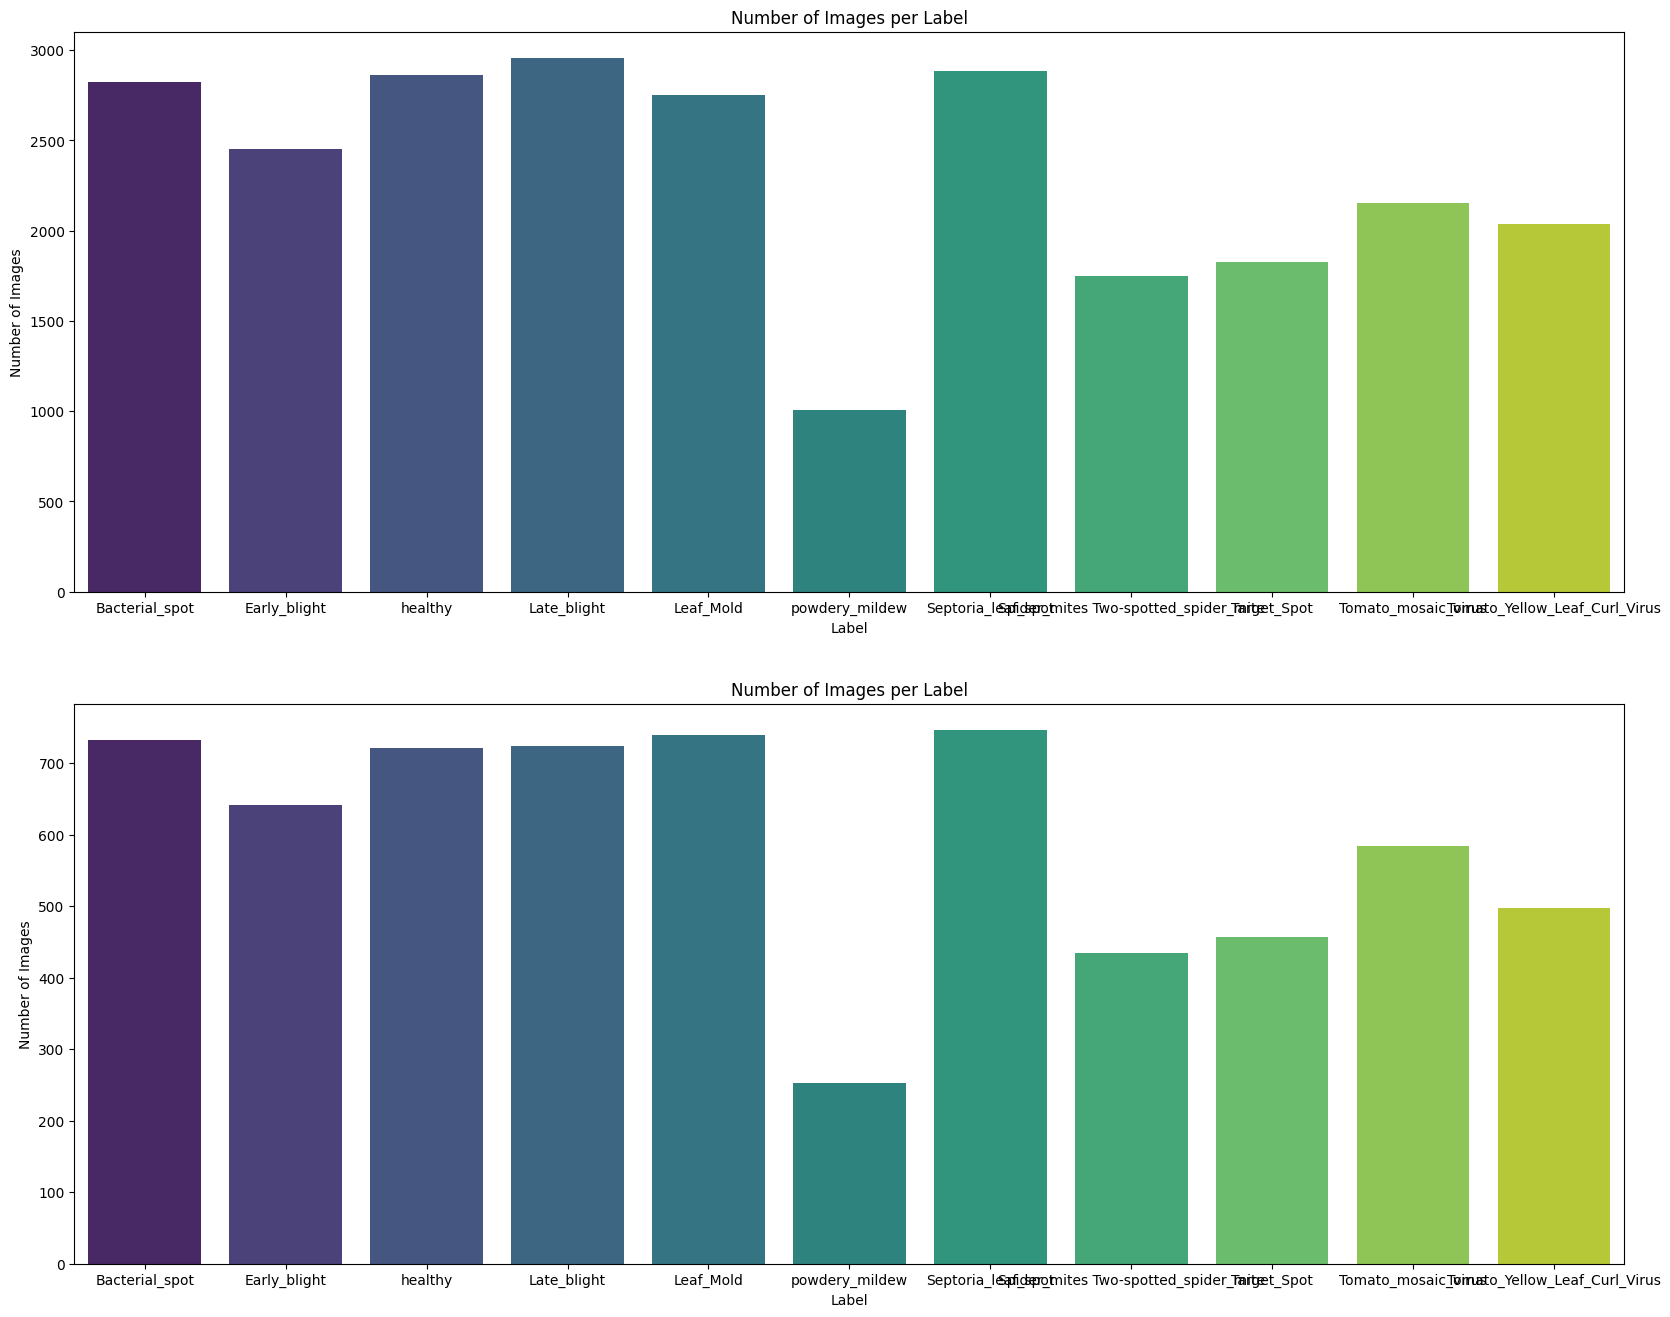

In [52]:
# 각 class 별 이미지 수 확인
def count_images(name):
    freq = {}
    data_path = os.path.join('jpg_data', name)
    for label_name in os.listdir(data_path):
        freq[label_name] = len(os.listdir(os.path.join(data_path, label_name)))
    return freq

train_freq = count_images('train')
test_freq = count_images('valid')


# 각 class 별 이미지 수 시각화
plt.figure(figsize=(20, 16))
plt.subplot(2, 1, 1)
sns.barplot(x=list(train_freq.keys()), y=list(train_freq.values()), palette='viridis', hue=list(train_freq.keys()))
plt.xlabel('Label')
plt.ylabel('Number of Images')
plt.title('Number of Images per Label')

plt.subplot(2, 1, 2)
sns.barplot(x=list(test_freq.keys()), y=list(test_freq.values()), palette='viridis', hue=list(test_freq.keys()))
plt.xlabel('Label')
plt.ylabel('Number of Images')
plt.title('Number of Images per Label')

plt.show()

> 데이터가 불균형한 경향이 있다.(오버샘플링 방법 고려)